In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn
import re
import string
import nltk 
import warnings as wings

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

##Handwritten Digit Classification

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
file_path = '/content/drive/My Drive/data/mnist_train.csv'
data = pd.read_csv(file_path)
data

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,...,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,147,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
data = data[data['label'] <= 4]

In [ ]:
features = list(data.columns[1:])
x = data[features]
y = data[['label']]

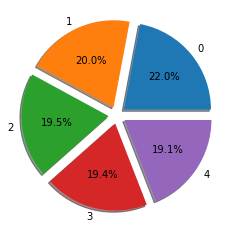

In [ ]:
mylabels = [0,1,2,3,4]
myexplode = [0.1, 0.1, 0.1, 0.1, 0.1]

plt.pie(y.value_counts(),autopct="%.1f%%", shadow = True, labels= mylabels, explode= myexplode)
plt.show() 

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
x_validation, x_test, y_validation, y_test = train_test_split(x_test, y_test, test_size=0.34) 


In [ ]:
print("Shapes:")
print("Training set = ",x_train.shape)
print("Validation set = ",x_validation.shape)
print("Testing set = ",x_test.shape)

Shapes:
Training set =  (21417, 784)
Validation set =  (6058, 784)
Testing set =  (3121, 784)


SVM

In [ ]:
svc = SVC()
svc.fit(x_train,y_train.values.ravel())

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
print("Train Accuracy before validation = ",svc.score(x_train,y_train.values.ravel()))
print("Test accuracy before validation = ",svc.score(x_test,y_test.values.ravel()))

Train Accuracy before validation =  0.9959844982957464
Test accuracy before validation =  0.9910285165011214


In [ ]:
from sklearn.metrics import classification_report

print("Classificaton report before Validation SVC")
predict = svc.predict(x_test)
print(classification_report(y_test, predict))

Classificaton report before Validation SVC
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       621
           1       0.99      0.99      0.99       715
           2       0.98      0.99      0.98       572
           3       1.00      0.98      0.99       643
           4       0.99      1.00      0.99       570

    accuracy                           0.99      3121
   macro avg       0.99      0.99      0.99      3121
weighted avg       0.99      0.99      0.99      3121



In [ ]:
grid_param= {'kernel': ('linear','rbf','poly'),'C': [0.001,0.1,10]} 
svc_grid = GridSearchCV(SVC(), grid_param, refit = True, verbose = 3,cv=5).fit(x_validation,y_validation.values.ravel())

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] C=0.001, kernel=linear ..........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............. C=0.001, kernel=linear, score=0.960, total=   4.1s
[CV] C=0.001, kernel=linear ..........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.1s remaining:    0.0s


[CV] .............. C=0.001, kernel=linear, score=0.951, total=   4.2s
[CV] C=0.001, kernel=linear ..........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    8.3s remaining:    0.0s


[CV] .............. C=0.001, kernel=linear, score=0.961, total=   4.2s
[CV] C=0.001, kernel=linear ..........................................
[CV] .............. C=0.001, kernel=linear, score=0.947, total=   4.1s
[CV] C=0.001, kernel=linear ..........................................
[CV] .............. C=0.001, kernel=linear, score=0.957, total=   4.3s
[CV] C=0.001, kernel=rbf .............................................
[CV] ................. C=0.001, kernel=rbf, score=0.221, total=  53.6s
[CV] C=0.001, kernel=rbf .............................................
[CV] ................. C=0.001, kernel=rbf, score=0.222, total=  53.6s
[CV] C=0.001, kernel=rbf .............................................
[CV] ................. C=0.001, kernel=rbf, score=0.221, total=  53.6s
[CV] C=0.001, kernel=rbf .............................................
[CV] ................. C=0.001, kernel=rbf, score=0.221, total=  53.6s
[CV] C=0.001, kernel=rbf .............................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed: 13.3min finished


In [ ]:
print(svc_grid.best_params_)

{'C': 10, 'kernel': 'rbf'}


In [ ]:
print(svc_grid.best_estimator_)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [ ]:
fin_svc = svc_grid.best_estimator_
fin_svc.fit(x_train,y_train.values.ravel())

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
print("Train Accuracy after validation = ",fin_svc.score(x_train,y_train.values.ravel()))
print("Test accuracy after validation = ",fin_svc.score(x_test,y_test.values.ravel()))

Train Accuracy after validation =  0.9999533081197179
Test accuracy after validation =  0.9948734380006409


In [ ]:
print("Classificaton report after Validation SVC")
predict_fin = fin_svc.predict(x_test)
print(classification_report(y_test, predict_fin))

Classificaton report after Validation SVC
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       621
           1       1.00      1.00      1.00       715
           2       0.99      0.99      0.99       572
           3       1.00      0.99      0.99       643
           4       0.99      1.00      0.99       570

    accuracy                           0.99      3121
   macro avg       0.99      0.99      0.99      3121
weighted avg       0.99      0.99      0.99      3121



##KNN

In [ ]:
knn = KNeighborsClassifier()
knn_param = {'n_neighbors':[5,10,100]}
knn_grid = GridSearchCV(knn, knn_param, refit = True, verbose = 3).fit(x_validation,y_validation.values.ravel())
print(knn_grid.best_params_)
knn_fin = knn_grid.best_estimator_

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] n_neighbors=5 ...................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....................... n_neighbors=5, score=0.974, total=  10.4s
[CV] n_neighbors=5 ...................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.5s remaining:    0.0s


[CV] ....................... n_neighbors=5, score=0.979, total=  10.4s
[CV] n_neighbors=5 ...................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   20.9s remaining:    0.0s


[CV] ....................... n_neighbors=5, score=0.977, total=  10.4s
[CV] n_neighbors=5 ...................................................
[CV] ....................... n_neighbors=5, score=0.980, total=  10.4s
[CV] n_neighbors=5 ...................................................
[CV] ....................... n_neighbors=5, score=0.986, total=  10.4s
[CV] n_neighbors=10 ..................................................
[CV] ...................... n_neighbors=10, score=0.969, total=  10.4s
[CV] n_neighbors=10 ..................................................
[CV] ...................... n_neighbors=10, score=0.975, total=  10.4s
[CV] n_neighbors=10 ..................................................
[CV] ...................... n_neighbors=10, score=0.968, total=  10.4s
[CV] n_neighbors=10 ..................................................
[CV] ...................... n_neighbors=10, score=0.971, total=  10.4s
[CV] n_neighbors=10 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  2.6min finished


{'n_neighbors': 5}


In [ ]:
knn_fin.fit(x_train, y_train.values.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
print("KNN score = ",knn_fin.score(x_test,y_test))

KNN score =  0.9903876962512015


In [ ]:
print("Classificaton report after Validation for  KNN")
print()
knn_predict = knn_fin.predict(x_test)
print(classification_report(y_test, knn_predict))

Classificaton report after Validation for  KNN

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       621
           1       0.98      1.00      0.99       715
           2       0.99      0.98      0.99       572
           3       1.00      0.98      0.99       643
           4       0.99      0.99      0.99       570

    accuracy                           0.99      3121
   macro avg       0.99      0.99      0.99      3121
weighted avg       0.99      0.99      0.99      3121



##Perceptron

In [ ]:
param_per = {'alpha' :[0.0001, 0.001,0.01], 'max_iter':[10,20,30,40], 'eta0': [1, 0.5]}

per_grid = GridSearchCV(Perceptron(), param_per, n_jobs=-1, refit = True, verbose = 3).fit(x_validation, y_validation.values.ravel())
print(per_grid.best_params_)
per_fin = per_grid.best_estimator_

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   53.5s finished


{'alpha': 0.0001, 'eta0': 1, 'max_iter': 10}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [ ]:
per_fin.fit(x_train,y_train.values.ravel())

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1,
           fit_intercept=True, max_iter=10, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
print("Perceptron score = ",per_fin.score(x_test,y_test))

Perceptron score =  0.9589875040051266


In [ ]:
print("Classificaton report after Validation for  Perceptron")
print()
predict_per = per_fin.predict(x_test)
print(classification_report(y_test, predict_per))

Classificaton report after Validation for  Perceptron

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       621
           1       0.99      0.97      0.98       715
           2       0.89      0.96      0.93       572
           3       0.96      0.94      0.95       643
           4       0.96      0.97      0.97       570

    accuracy                           0.96      3121
   macro avg       0.96      0.96      0.96      3121
weighted avg       0.96      0.96      0.96      3121



Comparison before Standardization

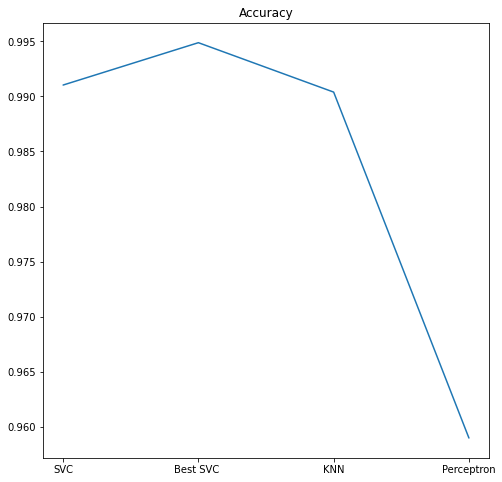

In [ ]:
models = ['SVC','Best SVC ', 'KNN', 'Perceptron']
acc = [ 0.9910285165011214, 0.9948734380006409 , 0.9903876962512015, 0.9589875040051266 ]
plt.figure(figsize=(8,8))
plt.title('Accuracy')
sns.set_style('whitegrid')
sns.lineplot(x=models, y=acc)

Standardization of Data


In [ ]:
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
x_validation, x_test, y_validation, y_test = train_test_split(x_test, y_test, test_size=0.34) 

In [ ]:
grid= {'kernel': ('linear','rbf','poly'),'C': [0.001,0.1,10]}
sv=SVC()
svm1= GridSearchCV(sv,grid,cv=5,refit = True, verbose = 3).fit(x_validation,y_validation.values.ravel())

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] C=0.001, kernel=linear ..........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............. C=0.001, kernel=linear, score=0.974, total=   6.9s
[CV] C=0.001, kernel=linear ..........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.9s remaining:    0.0s


[CV] .............. C=0.001, kernel=linear, score=0.973, total=   6.8s
[CV] C=0.001, kernel=linear ..........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   13.8s remaining:    0.0s


[CV] .............. C=0.001, kernel=linear, score=0.966, total=   6.7s
[CV] C=0.001, kernel=linear ..........................................
[CV] .............. C=0.001, kernel=linear, score=0.964, total=   6.6s
[CV] C=0.001, kernel=linear ..........................................
[CV] .............. C=0.001, kernel=linear, score=0.961, total=   6.7s
[CV] C=0.001, kernel=rbf .............................................
[CV] ................. C=0.001, kernel=rbf, score=0.216, total=  53.6s
[CV] C=0.001, kernel=rbf .............................................
[CV] ................. C=0.001, kernel=rbf, score=0.217, total=  53.4s
[CV] C=0.001, kernel=rbf .............................................
[CV] ................. C=0.001, kernel=rbf, score=0.216, total=  53.8s
[CV] C=0.001, kernel=rbf .............................................
[CV] ................. C=0.001, kernel=rbf, score=0.216, total=  53.1s
[CV] C=0.001, kernel=rbf .............................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed: 17.1min finished


In [ ]:
svm1=svm1.best_estimator_
svm1.fit(x_train,y_train.values.ravel())
print("SVC score: ", svm1.score(x_test,y_test))

SVC score:  0.9919897468760013


In [ ]:
print("Classificaton report after Standardization SVC")
predict_svcd = svm1.predict(x_test)
print(classification_report(y_test, predict_svcd))

Classificaton report after Standardization SVC
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       599
           1       1.00      0.99      1.00       707
           2       0.98      0.98      0.98       612
           3       0.99      0.99      0.99       611
           4       0.99      1.00      0.99       592

    accuracy                           0.99      3121
   macro avg       0.99      0.99      0.99      3121
weighted avg       0.99      0.99      0.99      3121



In [ ]:
grid= {'n_neighbors':[5,10,100]}
kn= KNeighborsClassifier(n_neighbors=6)
knn1 = GridSearchCV(kn,grid, refit = True, verbose = 3).fit(x_validation, y_validation.values.ravel())
knn1=knn1.best_estimator_

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] n_neighbors=5 ...................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....................... n_neighbors=5, score=0.970, total=  10.2s
[CV] n_neighbors=5 ...................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.2s remaining:    0.0s


[CV] ....................... n_neighbors=5, score=0.960, total=  10.2s
[CV] n_neighbors=5 ...................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   20.4s remaining:    0.0s


[CV] ....................... n_neighbors=5, score=0.960, total=  10.2s
[CV] n_neighbors=5 ...................................................
[CV] ....................... n_neighbors=5, score=0.965, total=  10.2s
[CV] n_neighbors=5 ...................................................
[CV] ....................... n_neighbors=5, score=0.953, total=  10.2s
[CV] n_neighbors=10 ..................................................
[CV] ...................... n_neighbors=10, score=0.969, total=  10.3s
[CV] n_neighbors=10 ..................................................
[CV] ...................... n_neighbors=10, score=0.962, total=  10.3s
[CV] n_neighbors=10 ..................................................
[CV] ...................... n_neighbors=10, score=0.960, total=  10.3s
[CV] n_neighbors=10 ..................................................
[CV] ...................... n_neighbors=10, score=0.962, total=  10.3s
[CV] n_neighbors=10 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  2.6min finished


In [ ]:
knn1.fit(x_train,y_train.values.ravel())
print("KNN score: ", knn1.score(x_test,y_test))

KNN score:  0.9727651393784044


In [ ]:
print("Classificaton report after Standardization KNN")
predict_knnd = knn1.predict(x_test)
print(classification_report(y_test, predict_knnd))

Classificaton report after Standardization KNN
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       599
           1       0.97      0.99      0.98       707
           2       0.97      0.93      0.95       612
           3       0.98      0.97      0.97       611
           4       0.96      0.99      0.97       592

    accuracy                           0.97      3121
   macro avg       0.97      0.97      0.97      3121
weighted avg       0.97      0.97      0.97      3121



In [ ]:
grid={'alpha' :[0.0001, 0.001,0.01], 'max_iter':[10,20,30,40], 'eta0': [1, 0.5]}
pr= Perceptron()
perc1 = GridSearchCV(pr, grid, n_jobs=-1, refit = True, verbose = 3).fit(x_validation, y_validation.values.ravel())

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   50.8s finished
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [ ]:
perc1=perc1.best_estimator_
perc1.fit(x_train,y_train.values.ravel())
print("Perceptron score: ", perc1.score(x_test,y_test))

Perceptron score:  0.9532201217558475


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [ ]:
print("Classificaton report after Standardization Perceptron")
predict_perd = perc1.predict(x_test)
print(classification_report(y_test, predict_perd))

Classificaton report after Standardization Perceptron
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       599
           1       0.97      0.98      0.97       707
           2       0.94      0.89      0.91       612
           3       0.94      0.95      0.95       611
           4       0.94      0.98      0.96       592

    accuracy                           0.95      3121
   macro avg       0.95      0.95      0.95      3121
weighted avg       0.95      0.95      0.95      3121



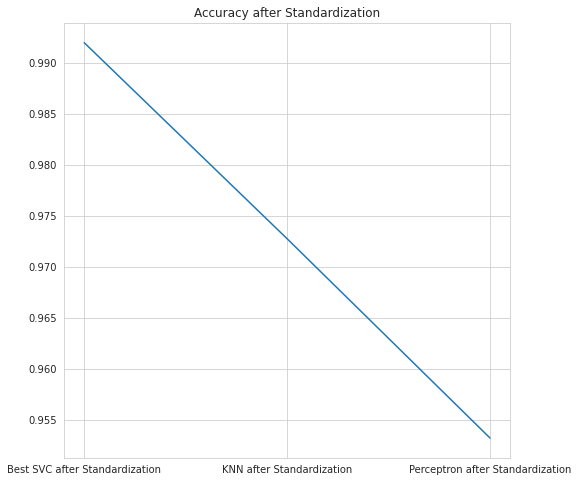

In [ ]:
models1 = ['Best SVC after Standardization', 'KNN after Standardization', 'Perceptron after Standardization']
acc1 = [0.9919897468760013 , 0.9727651393784044, 0.9532201217558475 ]
plt.figure(figsize=(8,8))
plt.title('Accuracy after Standardization')
sns.set_style('whitegrid')
sns.lineplot(x=models1, y=acc1)

##OVO and OVA implementation

In [ ]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
ovo = SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

md = OneVsOneClassifier(ovo)
md.fit(x_train, y_train.values.ravel())

OneVsOneClassifier(estimator=SVC(C=0.1, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma=1, kernel='poly', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   n_jobs=None)

In [ ]:
y_pred_ovo =md.predict(x_test)
print(accuracy_score(y_pred_ovo,y_test))

0.9926305671259211


In [ ]:
print("Classificaton report OVO")
print(classification_report(y_test, y_pred_ovo))

Classificaton report OVO
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       599
           1       1.00      0.99      1.00       707
           2       0.98      0.99      0.98       612
           3       1.00      0.99      0.99       611
           4       0.99      1.00      0.99       592

    accuracy                           0.99      3121
   macro avg       0.99      0.99      0.99      3121
weighted avg       0.99      0.99      0.99      3121



In [ ]:
ovo = SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

md2 = OneVsRestClassifier(ovo)
md2.fit(x_train, y_train.values.ravel())

OneVsRestClassifier(estimator=SVC(C=0.1, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  decision_function_shape='ovr', degree=3,
                                  gamma=1, kernel='poly', max_iter=-1,
                                  probability=False, random_state=None,
                                  shrinking=True, tol=0.001, verbose=False),
                    n_jobs=None)

In [ ]:
y_pred_ova=md2.predict(x_test)
print(accuracy_score(y_pred_ova,y_test))

0.9939122076257609


In [ ]:
print("Classificaton report OVA")
print(classification_report(y_test, y_pred_ova))

Classificaton report OVA
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       599
           1       1.00      0.99      1.00       707
           2       0.99      0.99      0.99       612
           3       1.00      0.99      0.99       611
           4       0.99      1.00      0.99       592

    accuracy                           0.99      3121
   macro avg       0.99      0.99      0.99      3121
weighted avg       0.99      0.99      0.99      3121



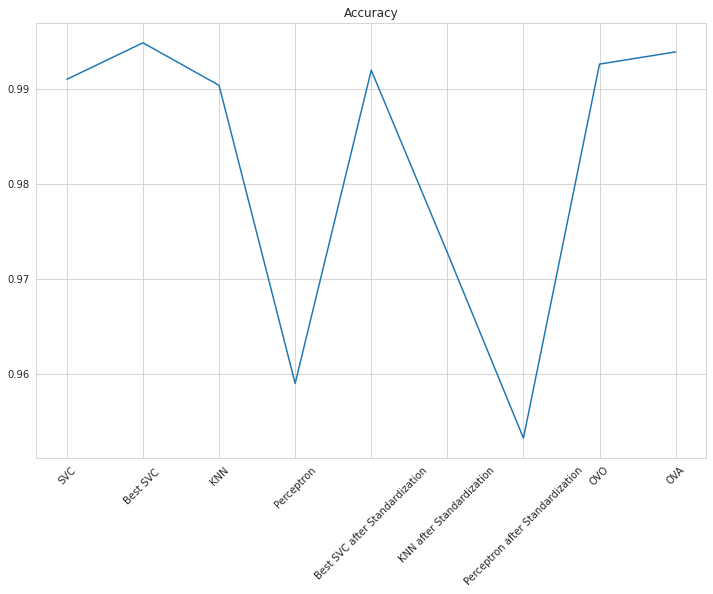

In [ ]:
models2 = ['SVC','Best SVC ', 'KNN', 'Perceptron','Best SVC after Standardization', 'KNN after Standardization', 'Perceptron after Standardization', 'OVO', 'OVA']
acc2 = [ 0.9910285165011214, 0.9948734380006409 , 0.9903876962512015, 0.9589875040051266, 0.9919897468760013 , 0.9727651393784044, 0.9532201217558475, 0.9926305671259211, 0.9939122076257609 ]

plt.figure(figsize=(12,8))
plt.title('Accuracy')
plt.xticks(rotation=45)
sns.set_style('whitegrid')
sns.lineplot(x=models2, y=acc2)